In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

best_features = np.load('/content/drive/MyDrive/RFE_128_2.npy')
ID = pd.read_csv('/content/drive/MyDrive/_end2.csv')

In [ ]:
X=best_features
df = ID.drop(['id','status'], axis=1)
y = df.values
#features_matrix_transposed = best_features.transpose()
#X=features_matrix_transposed


In [ ]:
# Apply SMOTE
#sm = SMOTE(random_state=42)
sm = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5, n_jobs=-1)
X_resampled, y_resampled = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
#Print the class distribution before and after SMOTE
unique, counts = np.unique(y, return_counts=True)
print("Class distribution before SMOTE:", dict(zip(unique, counts)))
unique, counts = np.unique(y_resampled, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique, counts)))

Class distribution before SMOTE: {1: 179, 2: 695, 3: 68}
Class distribution after SMOTE: {1: 695, 2: 695, 3: 695}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
clf = SVC(kernel='linear', C=1, random_state=42)
#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# train the SVM classifier
clf.fit(X_train, y_train)

# predict the labels for the testing set
y_pred = clf.predict(X_test)
clf.fit(X_train, y_train.ravel())

# print the classification report
#target_names = ['Present','Absent','Unknown']
target_names = ['Abnormal','Normal']
print(classification_report(y_test, y_pred, target_names=target_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

    Abnormal       0.72      0.74      0.73        98
      Normal       0.73      0.71      0.72        97

    accuracy                           0.73       195
   macro avg       0.73      0.73      0.73       195
weighted avg       0.73      0.73      0.73       195

[[73 25]
 [28 69]]


In [ ]:
def transpose(matrix):
  """Transposes a 2x2 matrix."""
  transposed_matrix = []
  for i in range(len(matrix[0])):
    transposed_row = []
    for j in range(len(matrix)):
      transposed_row.append(matrix[j][i])
    transposed_matrix.append(transposed_row)
  return transposed_matrix


matrix =cm
transposed_matrix = transpose(matrix)

def sum_array(matrix):
  """Sums all elements in a 2x2 matrix."""
  sum = 0
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      sum += matrix[i][j]
  return sum


n_total = sum_array(transposed_matrix)

def sum_first_row(matrix):
  """Sums the first row in a 2x2 matrix."""
  sum = 0
  for i in range(len(matrix[0])):
    sum += matrix[0][i]
  return sum



nTP_nFP = sum_first_row(transposed_matrix)

c_total=10*n_total+25*n_total+397*nTP_nFP-1718*(nTP_nFP**2//n_total)+11296*(nTP_nFP**4//n_total**3)+10000*transposed_matrix[0][0]+5000*transposed_matrix[1][0]
print(c_total)


970730


In [ ]:
# get the train accuracy
train_accuracy = clf.score(X_train, y_train)
print('Train accuracy:', train_accuracy)

# get the validation accuracy
validation_accuracy = clf.score(X_test, y_test)
print('Validation accuracy:', validation_accuracy)
# Calculate the evaluation metrics
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
fpr = cm[1, 0] / (cm[1, 0] + cm[0, 0])
f1_score = 2 * (sensitivity * specificity) / (sensitivity + specificity)

auc = roc_auc_score(y_test, y_pred)

#ppv = cm[1, 1] / (cm[1, 1] + cm[1, 2])
#npv = cm[0, 0] / (cm[0, 0] + cm[2, 0])

ppv = cm[1, 1] / (cm[1, 1] + cm[1, 0])
npv = cm[0, 0] / (cm[0, 0] + cm[0, 1])
# Print the evaluation metrics
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('FPR:', fpr)
print('F1 Score:', f1_score)

print('AUC:', auc)

print('PPV:', ppv)
print('NPV:', npv)

Train accuracy: 1.0
Validation accuracy: 0.4717948717948718
Sensitivity: 0.42105263157894735
Specificity: 0.52
FPR: 0.514018691588785
F1 Score: 0.46532438478747207
AUC: 0.4705263157894737
PPV: 0.42105263157894735
NPV: 0.52


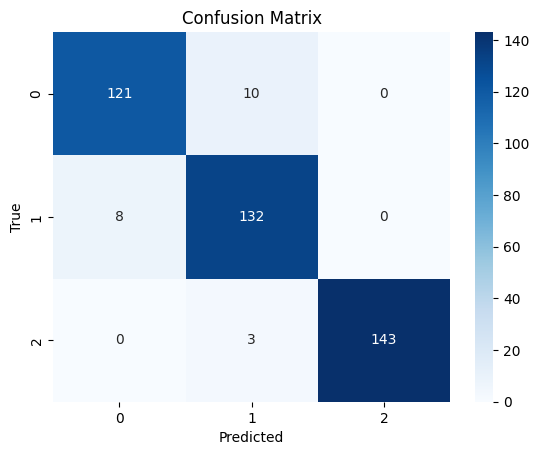

In [ ]:
# Create heatmap of confusion matrix
sns.heatmap(cm , annot=True, fmt='d', cmap='Blues')#, xticklabels=target_names, yticklabels=target_names)

# Add labels and title to plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.show()